In [1]:
import pandas as pd
import numpy as np
import math

valencia = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-mar-2023/master/data/airbnb.csv')

## limpiar los datos

# corregir el price (tiene $ y no es numérico)
valencia['price'] = valencia['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

valencia = valencia[valencia['price']<700]




In [2]:
valencia.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,55692,https://www.airbnb.com/rooms/55692,20221221170335,2022-12-22,previous scrape,Delight in city center,A great place to stay and visit Valencia.<br /...,NaN,https://a0.muscache.com/pictures/329316/a5d6a7...,120649,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.01
1,95393,https://www.airbnb.com/rooms/95393,20221221170335,2022-12-21,city scrape,Modern and bright Duplex 3 Bedrooms Center Wi-Fi,"This is ""Edificio Palomar Apartments"", I will ...",It is just 10 min walking distance to the Cath...,https://a0.muscache.com/pictures/931683/64aebc...,508042,...,4.77,4.76,4.68,31815,f,5,5,0,0,0.77
2,100347,https://www.airbnb.com/rooms/100347,20221221170335,2022-12-22,previous scrape,3BDR full Home at Sorolla station and Metro Jesús,Te va a encantar mi espacio por la ubicación y...,"Barrio de Jesús, cercano al centro, zona conso...",https://a0.muscache.com/pictures/b0bb18e8-1f24...,1451371,...,4.90,4.80,4.65,NaN,f,1,1,0,0,2.20
3,102524,https://www.airbnb.com/rooms/102524,20221221170335,2022-12-21,city scrape,EXCLUSIVE VILLA WITH POOL & 5 SUITES ON THE BEACH,DO NOT PARTY OR STAG/HEN PARTIES! THE RESERVAT...,Best restaurantes bars and clubs and chill out...,https://a0.muscache.com/pictures/d2019707-1596...,535881,...,4.63,4.80,4.33,VT-36438-V,f,6,5,1,0,1.31
4,103386,https://www.airbnb.com/rooms/103386,20221221170335,2022-12-21,city scrape,"Central 2 Bedrooms, 3/5 pers. Wi-Fi","This is ""Edificio Palomar Apartments"", I will ...",It is just 10 min walking distance to the Cath...,https://a0.muscache.com/pictures/44403436/e2a9...,508042,...,4.69,4.75,4.88,31813,f,5,5,0,0,0.12


In [3]:
valencia.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
valencia = valencia.drop(
    ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'bathrooms',
       'bathrooms_text',  'beds', 'amenities', 
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], axis=1
)

In [5]:
valencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 0 to 6710
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accommodates  6493 non-null   int64  
 1   bedrooms      6183 non-null   float64
 2   price         6493 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 202.9 KB


In [6]:
valencia = valencia.dropna()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(valencia[[ 'bedrooms', 'accommodates']], valencia['price'], shuffle=True, test_size=0.2)

In [8]:
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

In [9]:
X_train.isnull().sum()

bedrooms        0
accommodates    0
dtype: int64

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [18]:
rmse_values = []

for k in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    rmse_values.append(mean_squared_error(predictions, y_test)**0.5)
    
print(rmse_values)

[69.3536914590534, 60.584427190885414, 58.84778983476084, 54.12915402694743, 53.20873314932904, 52.548829607556875, 51.28198809775589, 50.53953369432002, 50.31404111070991, 50.33787279704625, 50.51469992272053, 50.182568299753164, 50.037984433695534, 50.0840173238242, 49.91659477596089, 49.79775502686218, 49.91306625488942, 49.497231212022015, 49.363643164543646, 49.64123874740964, 49.65036643646809, 49.78359552599257, 49.78754241777528, 49.76934717526908, 49.77610323502855, 49.800382463968035, 50.013563094379265, 49.91764349938917, 49.631729597935845, 49.6965458625809, 49.697733957227314, 49.64908717646813, 49.74974363927359, 49.717127827580455, 49.746013975935, 49.77524158331202, 49.64225878435019, 49.609127428085536, 49.562430065845085, 49.76438903884594, 49.58397370399015, 49.62345918450658, 49.68991073954467, 49.45443973892289, 49.51388933600268, 49.48352779067918, 49.58682355352749, 49.541217230483156, 49.715731022912536, 49.74476128291302, 49.64414459595511, 49.556282695429815, 

In [16]:
import matplotlib.pyplot as plt

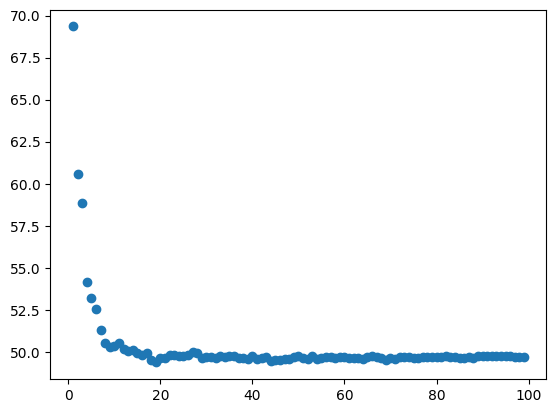

In [19]:
plt.scatter(range(1,100), rmse_values)


In [20]:
rmse_values = []

for k in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    rmse_values.append(mean_squared_error(predictions, y_test)**0.5)
    
print(rmse_values)

[69.3536914590534, 60.50430245269337, 58.74916309938507, 54.041238556766956, 53.149877784748384, 52.58289349155767, 51.24204329751079, 50.50882028859795, 50.27487890708107, 50.29217024528071, 50.568677180723746, 50.205790790035884, 50.05391384700003, 50.0993177385877, 49.954702457952436, 49.85676101599079, 49.9372182224828, 49.54826290337552, 49.438730961014656, 49.710095283801245, 49.71157596008155, 49.790360200533975, 49.785555935763426, 49.78832989487048, 49.78280534395057, 49.8326273379846, 49.991617033838054, 49.935968719022114, 49.68046655003107, 49.74206967075182, 49.74667365919741, 49.72410268632358, 49.820571668323694, 49.791371779864164, 49.83644979776462, 49.85086297528581, 49.742424571630515, 49.70400291861124, 49.68156274441889, 49.84870403966117, 49.669499224228794, 49.70548423793591, 49.740476199556454, 49.53600435629254, 49.56538552673499, 49.53285394365584, 49.61696451377041, 49.58259403739062, 49.73759799609739, 49.7431747714226, 49.67872463972302, 49.60242608781191, 

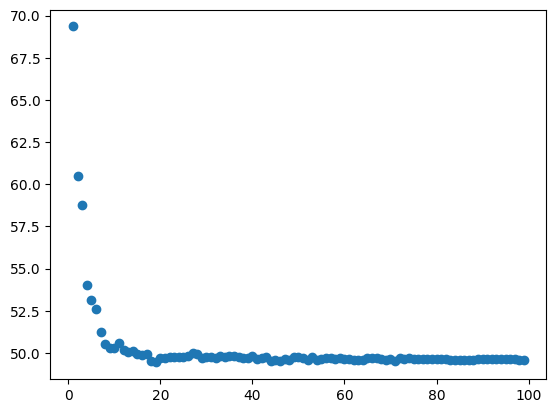

In [21]:
plt.scatter(range(1,100), rmse_values)

# Validación cruzada

# holdout validation

- Dividimos el conjunto en dos particiones (A, B)
- Usamos A como train y B como test
- Usamos B como test y A como train 
- Promediamos los resultados de error



In [22]:
valencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6710
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accommodates  6183 non-null   int64  
 1   bedrooms      6183 non-null   float64
 2   price         6183 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 193.2 KB


In [23]:
split = math.trunc(len(valencia)/2) # una posibilidad

In [25]:
X_A, X_B, y_A, y_B = train_test_split(valencia[[ 'bedrooms', 'accommodates']], valencia['price'], shuffle=True, test_size=0.5)

In [26]:
len(X_A)

3091

In [27]:
len(X_B)

3092

In [28]:
knn_ho = KNeighborsRegressor()
knn_ho.fit(
    X_A,
    y_A
)

KNeighborsRegressor()

In [29]:
pred_A = knn_ho.predict(X_B)


In [31]:
rmse_1 = mean_squared_error(y_B, pred_A)**0.5

In [32]:
rmse_1

55.99550137076424

In [33]:
knn_ho.fit(
    X_B,
    y_B
)

KNeighborsRegressor()

In [34]:
pred_2 = knn_ho.predict(X_A)

In [37]:
rmse_2 = mean_squared_error(y_A, pred_2)**0.5

In [38]:
rmse_2 

58.02800621999137

In [39]:
rmse = (rmse_1+rmse_2) / 2

In [41]:
rmse

57.0117537953778

# k-fold validation

- Dividimos el conjunto en k particiones
- Para cada k:
    Usamos la k-ésima partición como test y el resto como train
- Promediamos los resultado de error


In [42]:
k_split = math.trunc(len(valencia)/5)

In [43]:
k_split

1236

In [45]:
# barajar
np.random.seed(398943)
valencia = valencia.iloc[
    np.random.permutation(len(valencia))
]
        

In [46]:
valencia.head()

,accommodates,bedrooms,price
3669,6,2.0,115.0
3398,2,1.0,31.0
889,4,4.0,209.0
3217,2,1.0,95.0
6444,4,3.0,70.0


In [92]:
df = valencia.copy()

k_split = math.trunc(len(valencia)/10)

for i in range(0,10):
    df.loc[df.index[(k_split*i):(k_split*(i+1) if i<9 else len(df))], 'fold'] = i+1

In [93]:
df.head()

,accommodates,bedrooms,price,fold
3669,6,2.0,115.0,1.0
3398,2,1.0,31.0,1.0
889,4,4.0,209.0,1.0
3217,2,1.0,95.0,1.0
6444,4,3.0,70.0,1.0


In [94]:
df.tail()

,accommodates,bedrooms,price,fold
510,2,1.0,81.0,10.0
4866,5,2.0,103.0,10.0
4094,5,2.0,64.0,10.0
268,7,3.0,60.0,10.0
4622,6,3.0,146.0,10.0


In [95]:
(df['fold'] == 3).sum()

618

In [96]:
df['fold'].value_counts()

10.0    621
1.0     618
2.0     618
3.0     618
4.0     618
5.0     618
6.0     618
7.0     618
8.0     618
9.0     618
Name: fold, dtype: int64

In [97]:
rmse_list = []

for i in range(1,11):
    knn = KNeighborsRegressor()
    knn.fit(
        df[df['fold'] != i][['accommodates', 'bedrooms']],
        df[df['fold'] != i]['price']
    )
    pred = knn.predict(df[df['fold']==i][['accommodates', 'bedrooms']])
    rmse = mean_squared_error(df[df['fold']==i]['price'], pred)**0.5
    rmse_list.append(rmse)
    
    
    

In [98]:
rmse_list

[60.84381084462977,
 57.31270789890757,
 54.43517328543087,
 53.92109776354604,
 67.21222438512295,
 59.98825427140503,
 55.613676749041915,
 57.81111076153269,
 49.39572034716051,
 56.32630478407064]

In [99]:
np.mean(rmse_list)

57.2860081090848

Cualquier modelo tiene realmente dos tipos de error:

- **Sesgo (bias)**: resulta de las *malas suposiciones* del algoritmo de aprendizaje: o hemos tomado mal los datos, o hemos elegido mal las variables. Esto lo vemos en el rmse.
- **Varianza**: viene dada por la variabilidad de los valores predecidos de un modelo.

    


In [100]:
df[(df['accommodates'] == 6) & (df['bedrooms'] == 2)]['price'].std()

53.919832203018395

In [101]:
np.std(rmse_list)

4.5187448954434775